<a href="https://colab.research.google.com/github/atefar2/DAD-CORP-LLC/blob/master/Show%20Me%20Da%20Money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install pandas
!pip install numpy
!pip install matplotlib
#!pip install quandl
!pip install statsmodels 
#!pip install gs_quant
!pip install pandas-ta
!pip install finta
#!pip install alpha_vantage
!pip install pandas-datareader
!pip install --upgrade ta
!pip install -U scikit-learn
!pip install scipy
!pip install hmmlearn==0.2.3


  Created wheel for pandas-ta: filename=pandas_ta-0.1.36b0-cp36-none-any.whl size=102025 sha256=624c13b8297d31919e8d1a00b3ee533aab19a916952f31558d2653edaea9b304
  Stored in directory: /root/.cache/pip/wheels/02/2a/94/0d33517e37b59587ef4f11c36f6ab91f202b0dbcb51e976dda
Successfully built pandas-ta
  Created wheel for finta: filename=finta-0.4.2-cp36-none-any.whl size=23717 sha256=527f89bb351dd2c46b69137e6d211f91477615cd37290f8fe07fa5d4520119e6
  Stored in directory: /root/.cache/pip/wheels/d8/a2/07/a2aed82196fe9af0533d66a8855413c288170e4e29d30f5c05
Successfully built finta
  Created wheel for ta: filename=ta-0.5.15-cp36-none-any.whl size=23439 sha256=7b282fda722eaa5e25bebd5b45706ee80af6e3bbe10dd005650a7282f2596214
  Stored in directory: /root/.cache/pip/wheels/53/b3/ec/93bd3d04147adcf06fab4ba9926b1150c987d8ffa053374709
Successfully built ta
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.22.2.post1)
     |████████████████████████████████| 368kB 2

In [0]:

import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import pandas_datareader.data as web
import datetime
#import quandl
import statsmodels.api as sm
#import gs_quant as gs
#import gs_quant.timeseries as ts
#from gs_quant.timeseries import Window
import os
import pandas_ta as ta
import finta as tia
#import alpha_vantage as av
#from alpha_vantage.timeseries import TimeSeries
#from alpha_vantage.techindicators import TechIndicators
import ta as uta 
#https://github.com/bukosabino/ta

import scipy as sp

import hmmlearn
from hmmlearn.hmm import GaussianHMM


# HIDDEN MARKOV MODEL

####https://github.com/theJollySin/scipy_con_2019/blob/master/modern_time_series_analysis/ModernTimeSeriesAnalysis/StateSpaceModels/2_Gaussian_HMM_INSTRUCTOR.ipynb

In [0]:
start = datetime.datetime(2019,1,1)
end = datetime.datetime(2020,3,27)

#https://github.com/je-suis-tm/quant-trading

#QUANDL_api_key = 'qpmUo-eN7ZiNgAL1FUj6'
#alpha_key = 'QJLSTP496N8PKUIO'


#quandl.ApiConfig.api_key = 'qpmUo-eN7ZiNgAL1FUj6'
#mydata = quandl.get('WIKI/APPL')
#mydata.head()

In [0]:


#quandl.ApiConfig.api_key = 'qpmUo-eN7ZiNgAL1FUj6'
#mydata = quandl.get('WIKI/APPL')
#mydata.head()

TRY THE NEW GRID TICK
https://stackoverflow.com/questions/24943991/change-grid-interval-and-specify-tick-labels-in-matplotlib

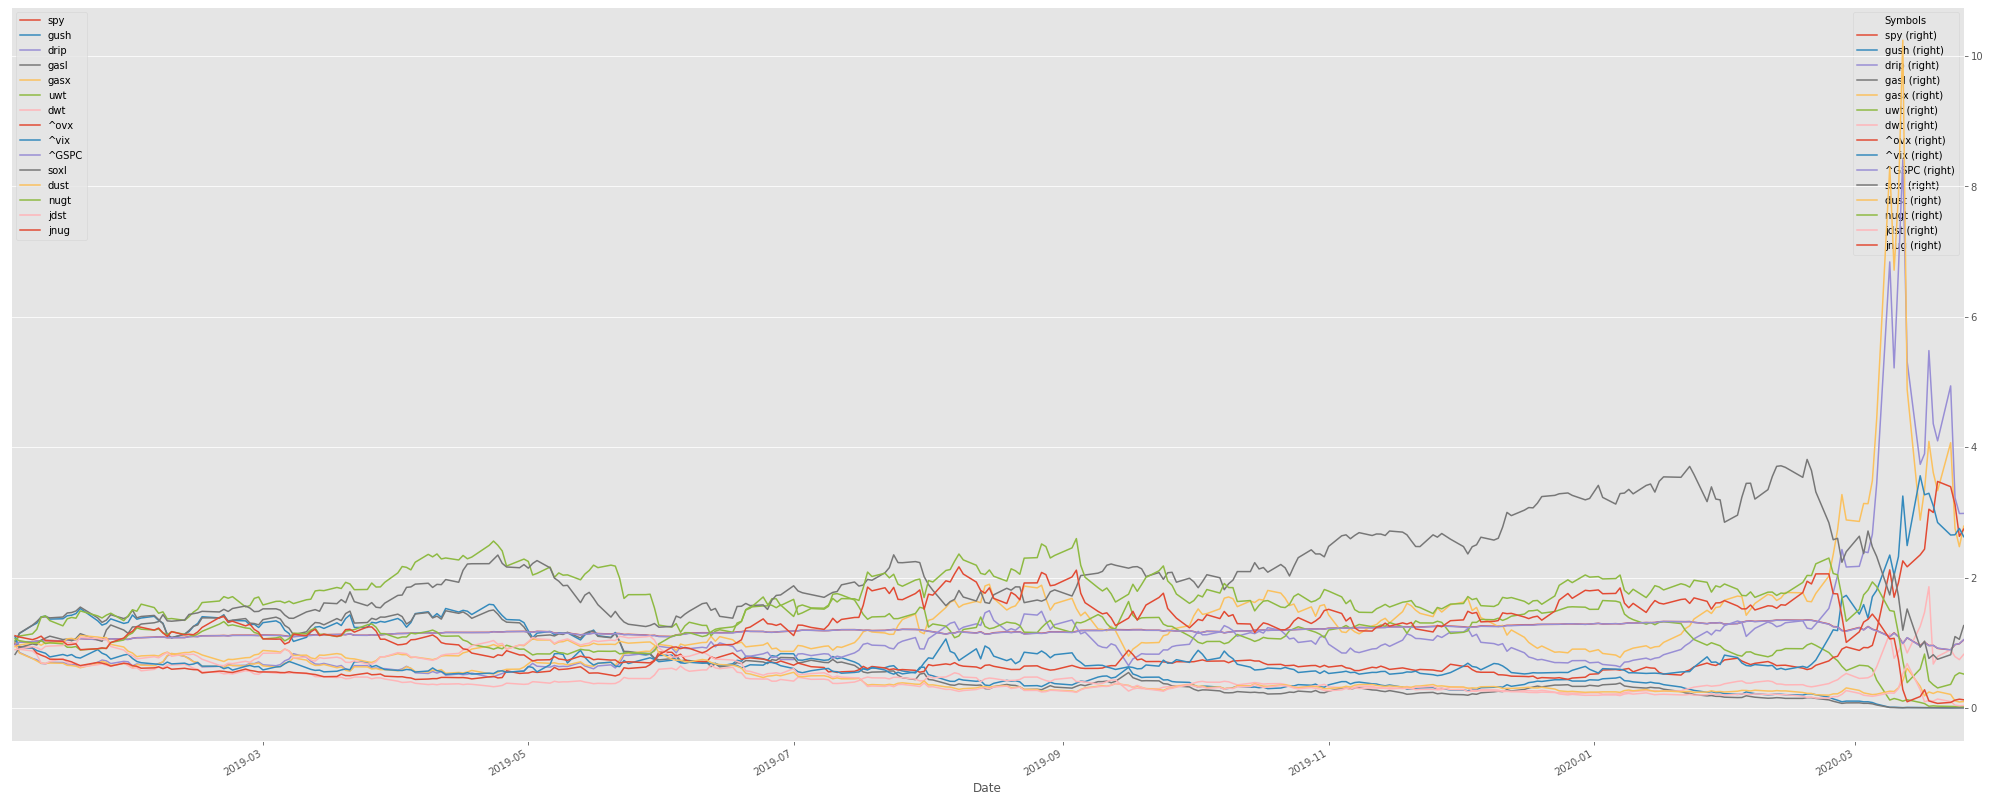

In [5]:

%matplotlib inline
plt.style.use('ggplot')

spy = web.DataReader('spy','yahoo',start,end,)
#gush = web.DataReader('gush','yahoo',start,end,)
#drip = web.DataReader('drip','yahoo',start,end,)
#gasl = web.DataReader('gasl','yahoo',start,end,)
#gasx = web.DataReader('gasx','yahoo',start,end,)
#uwt = web.DataReader('uwt','yahoo',start,end,)
#dwt = web.DataReader('dwt','yahoo',start,end,)
#ovx = web.DataReader('^ovx','yahoo',start,end,)
vix = web.DataReader('^vix','yahoo',start,end,)
spy5 = web.DataReader('^GSPC','yahoo',start,end,)
#soxl = web.DataReader('soxl','yahoo',start,end,)
#dust = web.DataReader('dust','yahoo',start,end,)
#nugt = web.DataReader('nugt','yahoo',start,end,)
#jdst = web.DataReader('jdst','yahoo',start,end,)
#jnug = web.DataReader('jnug','yahoo',start,end,)

tickers = ['spy','gush','drip','gasl','gasx','uwt','dwt',
           '^ovx','^vix','^GSPC','soxl','dust','nugt','jdst','jnug',]

porto = web.DataReader(tickers, 'yahoo',start,end,)


porto_daily_return = porto['Close'].pct_change()

(porto_daily_return + 1).cumprod().plot(figsize=(35,15),secondary_y=True,)
plt.legend(loc='upper left')

plt.show()

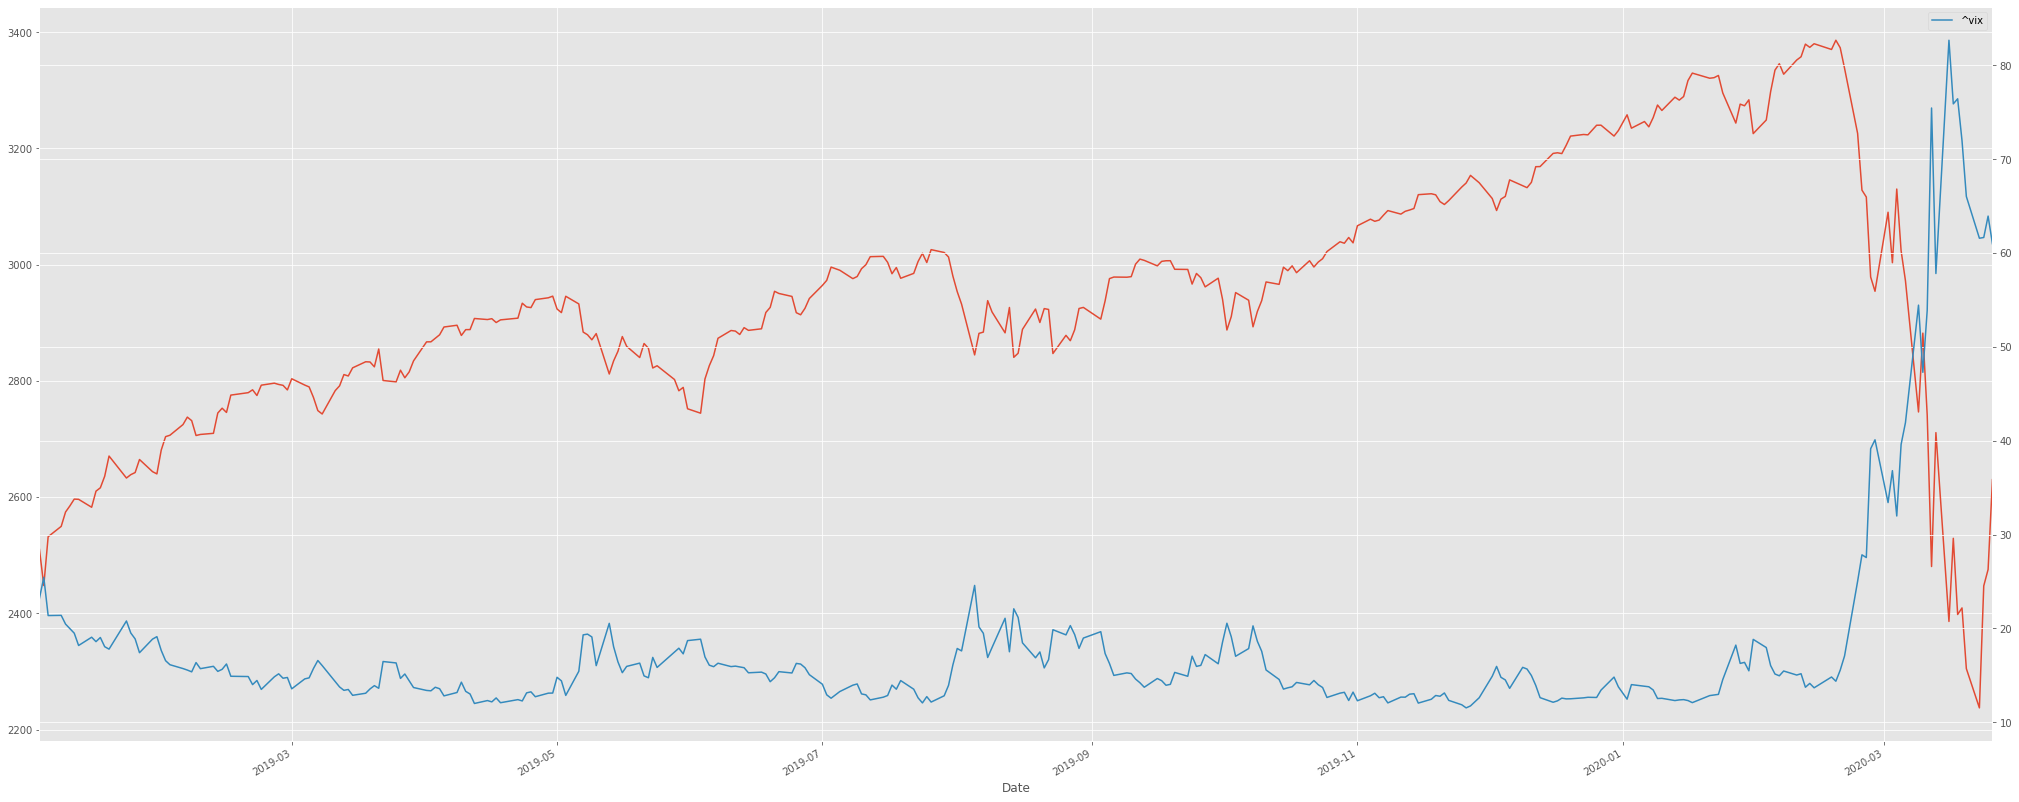

In [6]:
%matplotlib inline
plt.style.use('ggplot')

spy5.Close.plot(label= '^GSPC',figsize=(35,15),secondary_y=False,grid = True)
#ovx.Close.plot(label= '^ovx',figsize=(35,15),secondary_y=False)
#spy.Close.plot(label= 'spy',figsize=(35,15),secondary_y=False)
vix.Close.plot(label= '^vix',figsize=(35,15),secondary_y=True,grid = True)
#gush.Close.plot(label= 'gush',figsize=(35,15),secondary_y=False)
##gasl.Close.plot(label= 'gasl',figsize=(35,15),secondary_y=False)
#gasx.Close.plot(label= 'gasx',figsize=(35,15),secondary_y=False)
#drip.Close.plot(label= 'drip',figsize=(35,15),secondary_y=False)
#uwt.Close.plot(label= 'uwt',figsize=(35,15),secondary_y=True)
#dwt.Close.plot(label= 'dwt',figsize=(35,15),secondary_y=False)
#soxl.Close.plot(label= 'soxl',figsize= (35,15),secondary_y=False,)
#dust.Close.plot(label= 'dust',figsize= (35,15),secondary_y=False)
#jdst.Close.plot(label= 'jdst',figsize= (35,15),secondary_y=False)
#nugt.Close.plot(label= 'nugt',figsize= (35,15),secondary_y=False)
#jnug.Close.plot(label= 'jnug',figsize= (35,15),secondary_y=False)
#porto.Close.plot(figsize=(35,15),secondary_y=False)
#plt.grid(b=None, which='major',axis='both',)      

plt.legend()
plt.show()


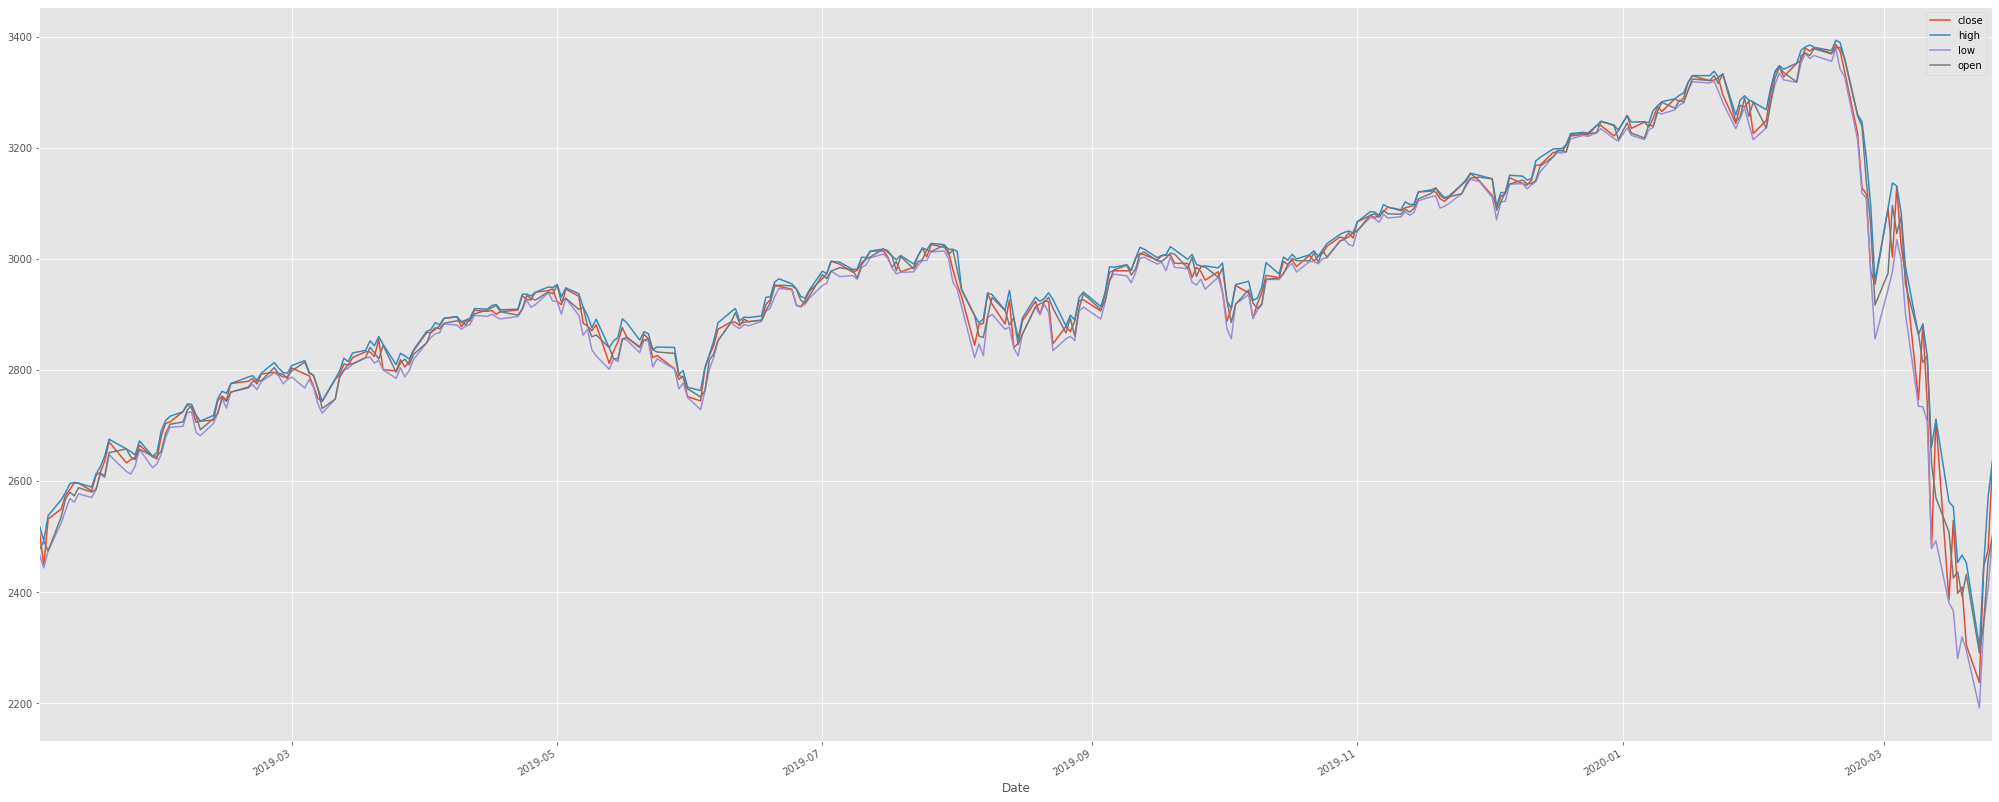

In [7]:
spy5.dropna(inplace=True)
spy5.index = pd.to_datetime(spy5.index)

spy5.Close.plot(label= 'close',figsize= (35,15),secondary_y=False,)
spy5.High.plot(label= 'high',figsize= (35,15),secondary_y=False,)
spy5.Low.plot(label= 'low',figsize= (35,15),secondary_y=False,)
spy5.Open.plot(label= 'open',figsize= (35,15),secondary_y=False,)
plt.legend()


# Watson Studio Desktop is now free for academia

https://medium.com/ibm-watson/watson-studio-desktop-is-now-free-for-academia-f8b50a118370

In [0]:
#from statsmodels.tsa.seasonal import seasonal_decompose
#olsmod = sm.OLS(spy5.Close,spy5.index,missing='none',hasconst=None,)



/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

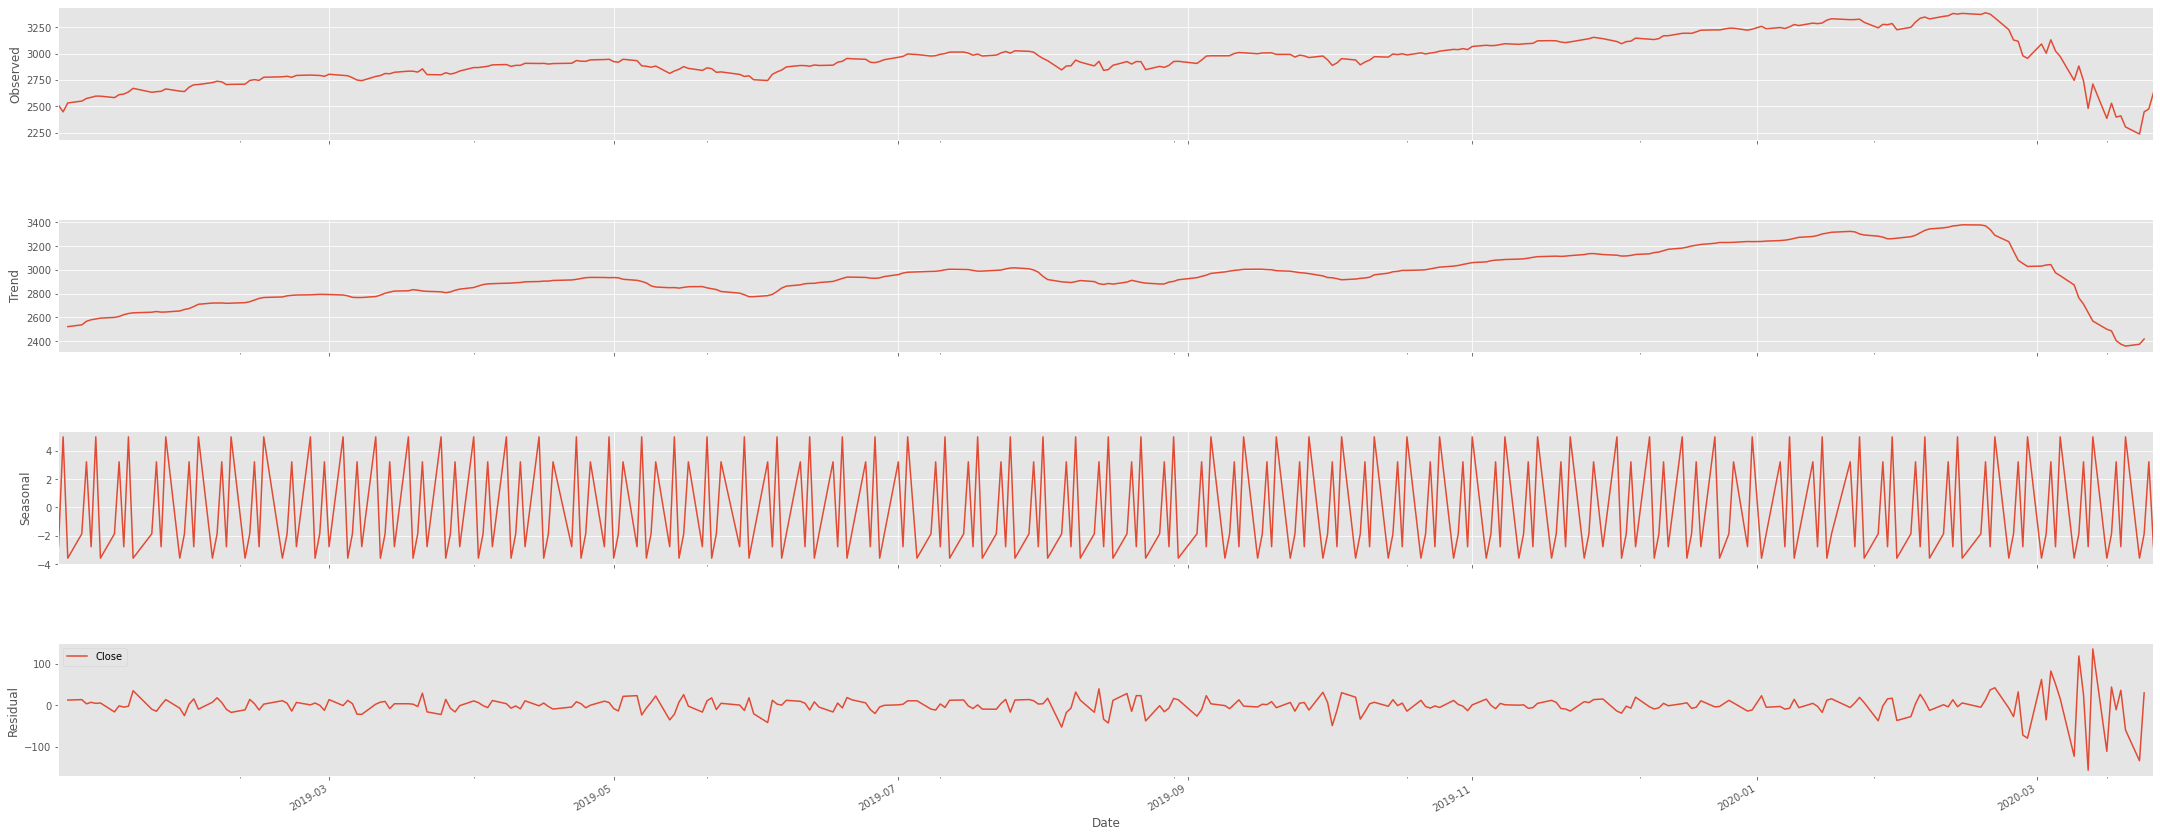

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(spy5.Close,model="additive",freq=5)

fig = result.plot()
plt.grid()
fig.set_size_inches(35,15)

plt.legend()

Date
2019-01-02            NaN
2019-01-03            NaN
2019-01-04    2522.791943
2019-01-07    2537.777930
2019-01-08    2567.527930
                 ...     
2020-03-20    2359.427979
2020-03-23    2374.919971
2020-03-24    2419.056006
2020-03-25            NaN
2020-03-26            NaN
Name: Close, Length: 311, dtype: float64

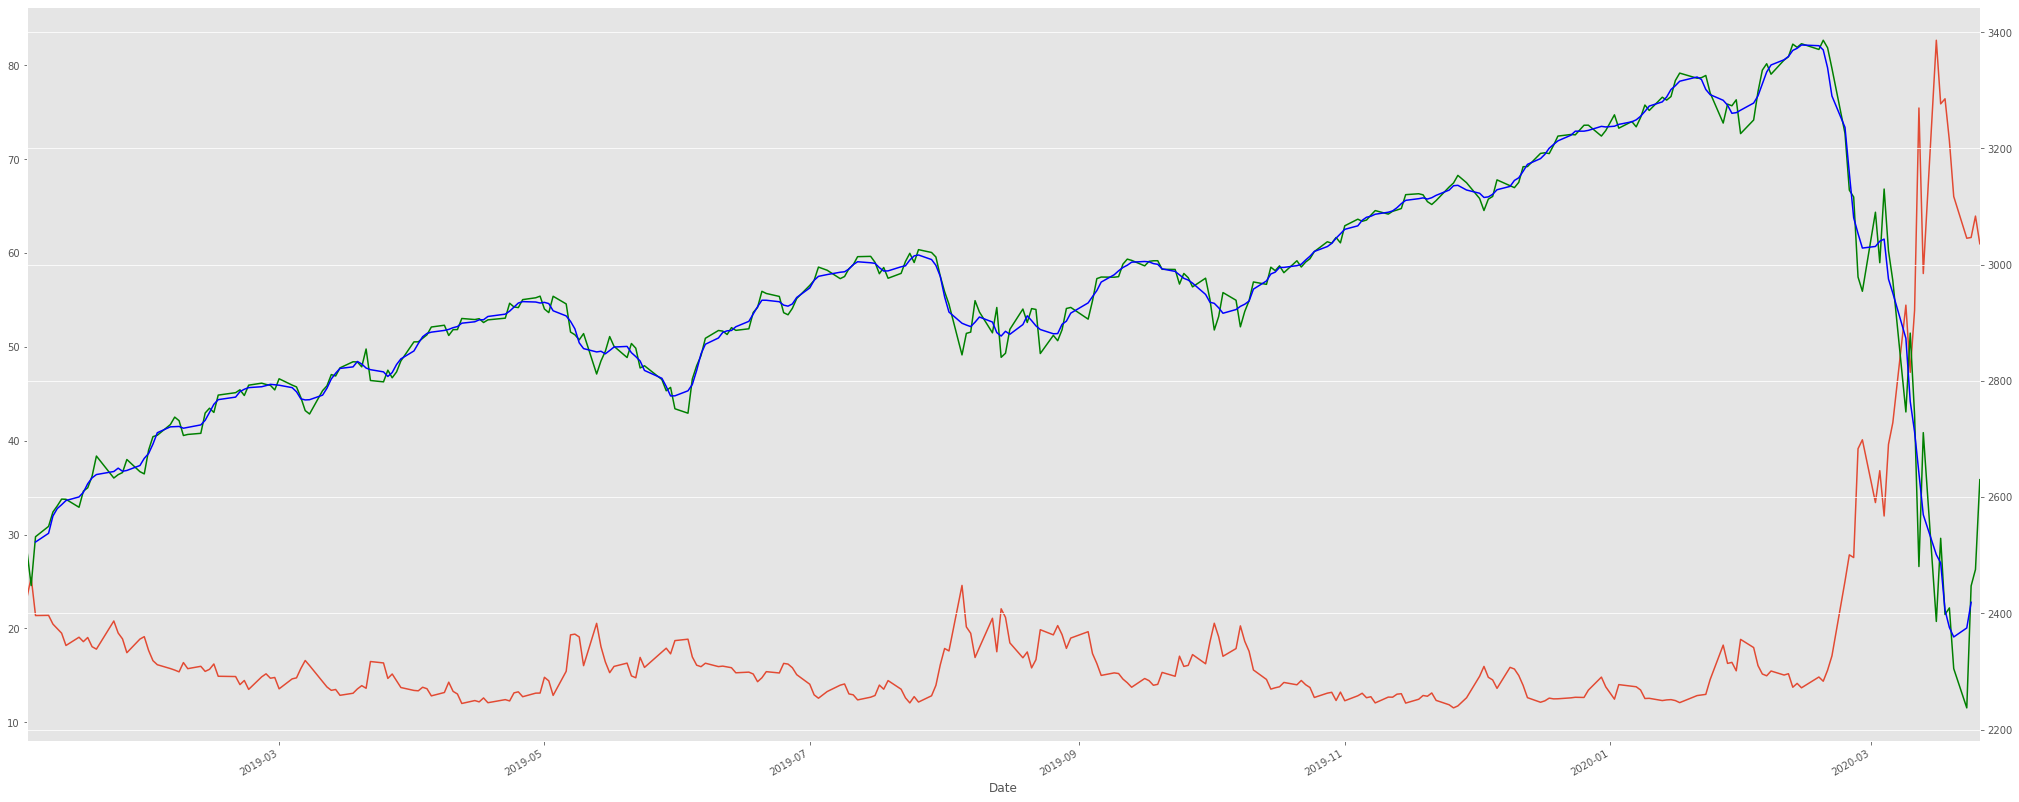

In [10]:
plt.figure()
plt.grid()


vix.Close.plot(label= '^vix',figsize=(35,15),secondary_y=False)
#spy.Close.plot(label= 'spy',figsize=(35,15),secondary_y=True, style='b')
spy5.Close.plot(label= 'spy5',figsize=(35,15),secondary_y=True, style='g',grid=True)
result.trend.plot(figsize=(35,15),secondary_y=True, style='b')

result.trend

**bold text*#https://github.com/peerchemist/finta/tree/master/examples*

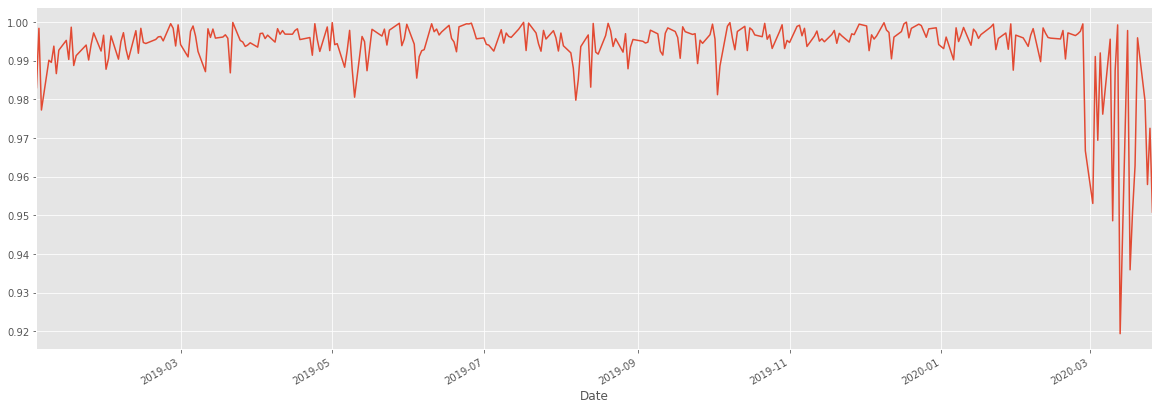

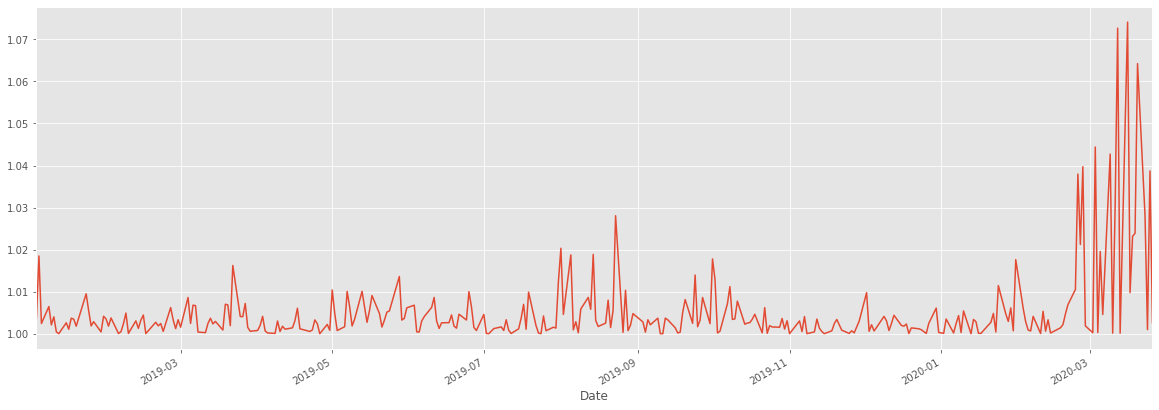

In [11]:
df = pd.DataFrame(spy5)

df['new'] = df['Low']/df['Adj Close']
df['new1'] = df['High']/df['Adj Close']

plt.show()
df.new.plot(figsize=(20,7))
plt.show()
df.new1.plot(figsize=(20,7))
plt.legend
plt.show()

In [0]:
spy5['hma'] = ta.hma(spy5['Close'], length=25)
spy5['hma2'] = ta.ema(spy5['Close'], length=20)
spy5['hma3'] = ta.ema(spy5['Close'], length=40)
spy5['hma4'] = ta.ema(spy5['Close'], length=50)
spy5['ema'] = ta.ema(spy5.Close, length=15)
spy5['fwma'] = ta.fwma(spy5['Close'],length=12,asc=True)
#spy5['stoch'] = uta.momentum.UltimateOscillator(spy5['High'],spy5['Low'],spy5['Close'],s=7,m=14,len=28,ws=4.0,wm=2.0,wl=1.0,fillna=False)
#spy5.stoch.plot()
#buy = [spy5['hma2'] > spy5['ema']]
#sell = [spy5['hma2'] < spy5['ema']]

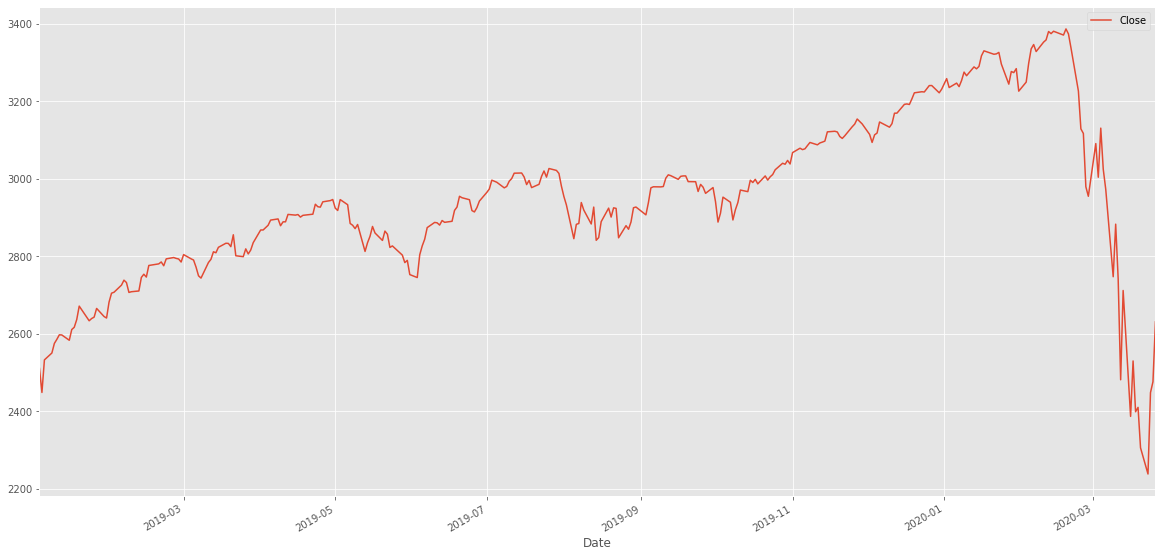

In [13]:
spy5.Close.plot(figsize=(20,10),secondary_y=False,)
#spy5.hma.plot()
#spy5.hma2.plot()
#spy5.hma3.plot()
#spy5.ema.plot()
#spy5.stoh.plot(figsize=(35,5),secondary_y=True,)
#spy5.fwma.plot()
#vix.Close.plot(secondary_y=True,)
#spy5.stoch.plot()
#plt.grid()
plt.legend()

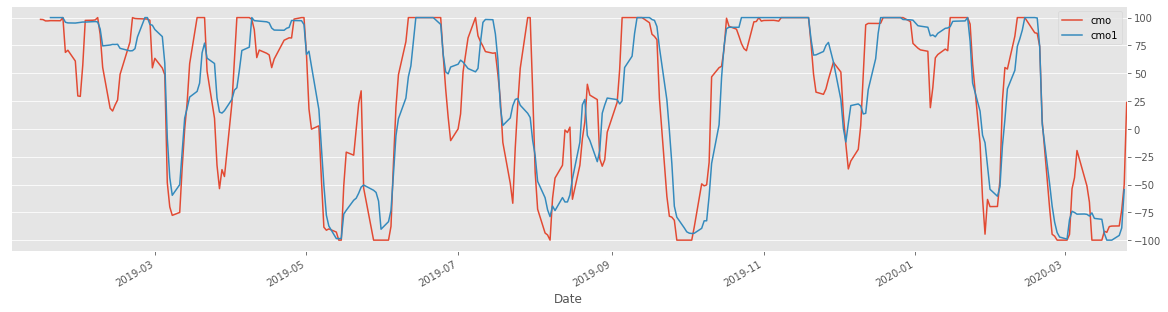

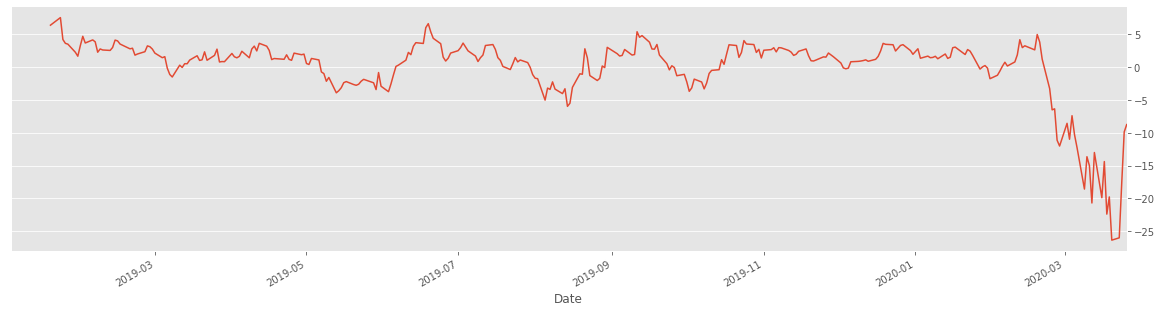

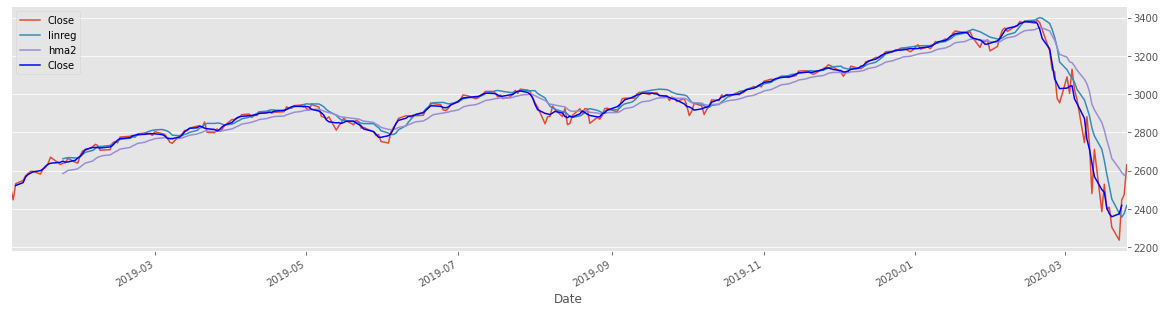

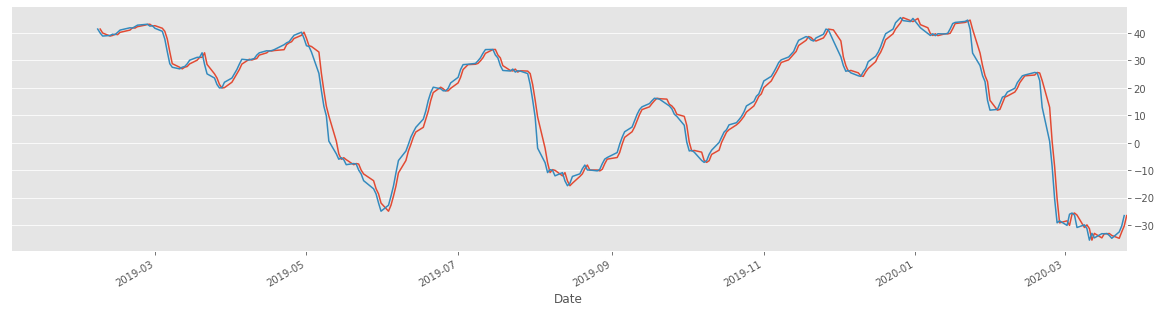

No handles with labels found to put in legend.


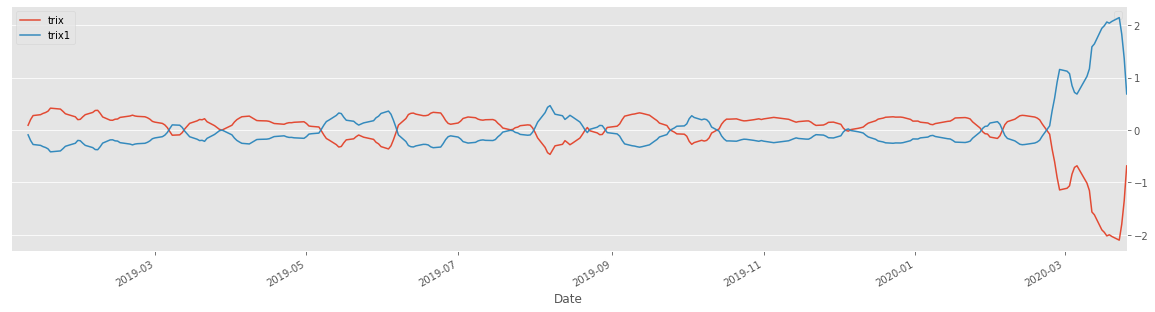

<bound method Series.count of Date
2019-01-02            NaN
2019-01-03            NaN
2019-01-04    2522.791943
2019-01-07    2537.777930
2019-01-08    2567.527930
                 ...     
2020-03-20    2359.427979
2020-03-23    2374.919971
2020-03-24    2419.056006
2020-03-25            NaN
2020-03-26            NaN
Name: Close, Length: 311, dtype: float64>

In [14]:

spy5['cmo'] = ta.cmo(spy5['Close'],6,3,None)
spy5.cmo.plot(figsize=(20,5),secondary_y=True,);


spy5['cmo1'] = ta.cmo(spy5['Close'],10,4,-1)
spy5.cmo1.plot(figsize=(20,5),secondary_y=True,)

plt.legend();
plt.show()

spy5['roc'] = ta.roc(spy5['Close'],12,None,)
spy5.roc.plot(figsize=(20,5),secondary_y=True,)
plt.show()


spy5.Close.plot(figsize=(20,5),secondary_y=True,)

spy5['linreg'] = ta.linreg(spy5['High'],length=15,offset=None)
spy5.linreg.plot(figsize=(20,5),secondary_y=True,)

spy5['hma2'] = ta.ema(spy5['Close'], length=15)
spy5.hma2.plot(figsize=(20,5),secondary_y=True,)

result.trend.plot(figsize=(20,5),secondary_y=True, style='b')

plt.legend()

plt.show()

spy5['tsi'] = ta.tsi(spy5['Close'],13,25,1,None,)
spy5.tsi.plot(figsize=(20,5),secondary_y=True,);

spy5['tsi1'] = ta.tsi(spy5['Close'],13,25,1,-1,)
spy5.tsi1.plot(figsize=(20,5),secondary_y=True,);

plt.show()

#spy5['stoch'] = uta.momentum.StochasticOscillator(spy5['High'],spy5['Low'],spy5['Close'],n=14,d_n=3,fillna=False,)

#spy5.stoch.plot(figsize=(35,5),secondary_y=False,)
plt.legend()
spy5['trix'] = ta.trix(spy5['Close'],5,1,None,)
spy5.trix.plot(figsize=(20,5),secondary_y=True,)
plt.legend()
spy5['trix1'] = ta.trix(spy5['Close'],5,-1,1,)
spy5.trix1.plot(figsize=(20,5),secondary_y=True,)
plt.legend()

plt.show()
result.trend.count


In [15]:
# R Squared
result.trend.dropna(inplace=True)
result.trend.index = pd.to_datetime(result.trend.index)
spy5R2 = web.DataReader('^GSPC','yahoo',start =datetime.datetime(2019,1,4),end=datetime.datetime(2020,3,24))

X = spy5R2.iloc[:,3:4].values
Y = result.trend.values

from sklearn.metrics import r2_score

sklearn.metrics.r2_score(Y,X,)




0.9837098664523972

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


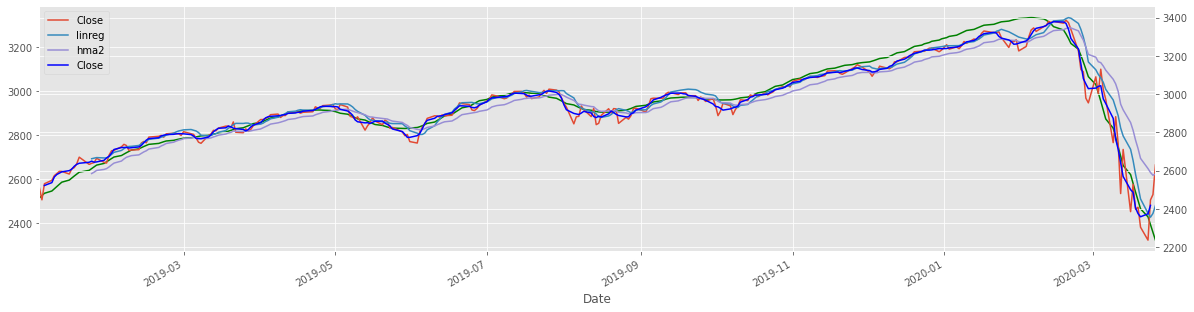

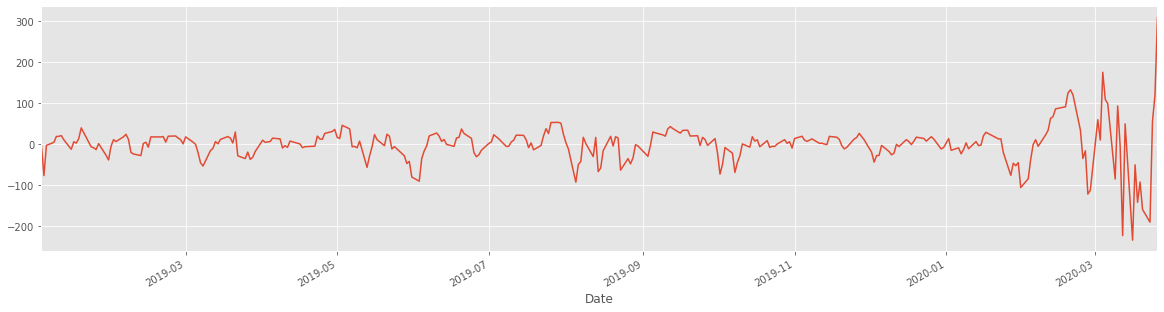

In [16]:
spy5cycle, spy5trend = sm.tsa.filters.hpfilter(spy5.Close,1600)

spy5_decomp = spy5.Close
spy5_decomp['cycle'] = spy5cycle
spy5_decomp['trend'] = spy5trend

spy5.Close.plot(figsize=(20,5),secondary_y=True,)

spy5['linreg'] = ta.linreg(spy5['High'],length=15,offset=None)
spy5.linreg.plot(figsize=(20,5),secondary_y=True,)

spy5['hma2'] = ta.ema(spy5['Close'], length=15)
spy5.hma2.plot(figsize=(20,5),secondary_y=True,)

result.trend.plot(figsize=(20,5),secondary_y=True, style='b')

plt.legend()


spy5_decomp.trend.plot(figsize=(20,5),style='g',secondary_y=False,)
plt.show()
spy5_decomp.cycle.plot(figsize=(20,5))
plt.show()

## WORK ON UTA STOCHASTIC TO PUT IN IBM WATSON

In [18]:
# R Squared
spy5_decomp.trend.dropna(inplace=True)
spy5_decomp.trend.index = pd.to_datetime(spy5_decomp.trend.index)
spy5R2 = web.DataReader('^GSPC','yahoo',start =datetime.datetime(2019,1,1),end=datetime.datetime(2020,3,26))

X = spy5R2.iloc[:,3:4].values
Y = spy5_decomp.trend.values

from sklearn.metrics import r2_score

sklearn.metrics.r2_score(Y,X,)



0.9457294055393146

# HoW to download any data set. CSV OR ANY FILE TYPE

In [0]:
from google.colab import files

spy5.to_csv('spy5.csv')
#files.download('spy5.csv')


##ARIMA MODEL
#https://www.youtube.com/watch?v=tJ-O3hk1vRw&list=TLPQMTgwMzIwMjDVBlrxQ8iheA&index=3

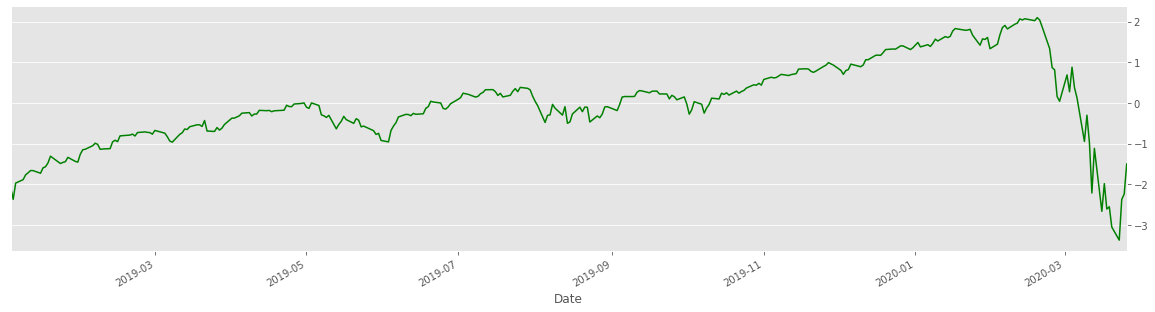

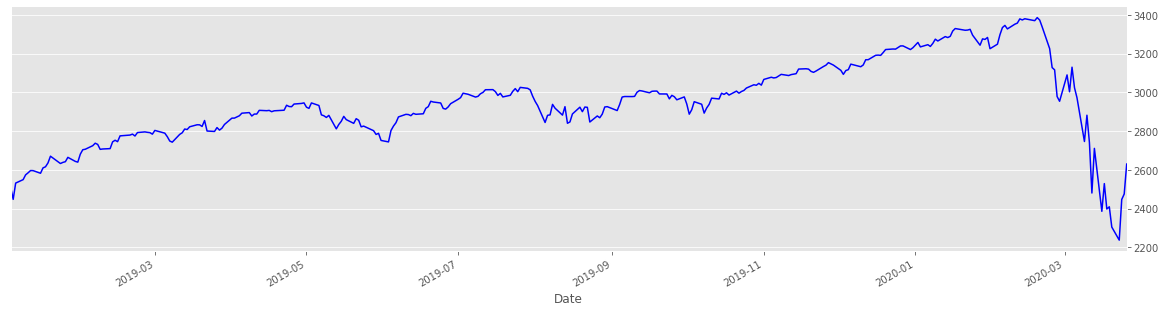

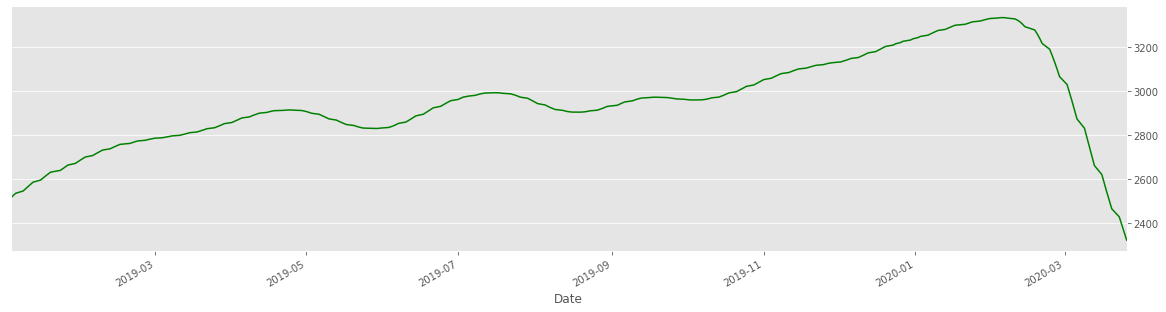

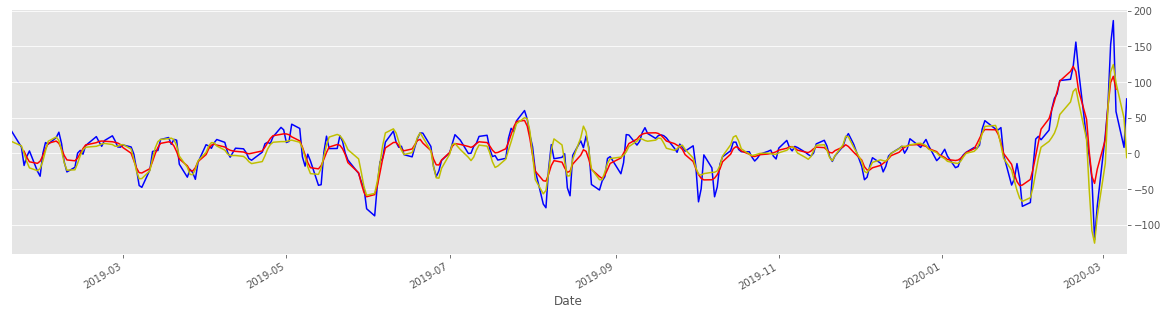

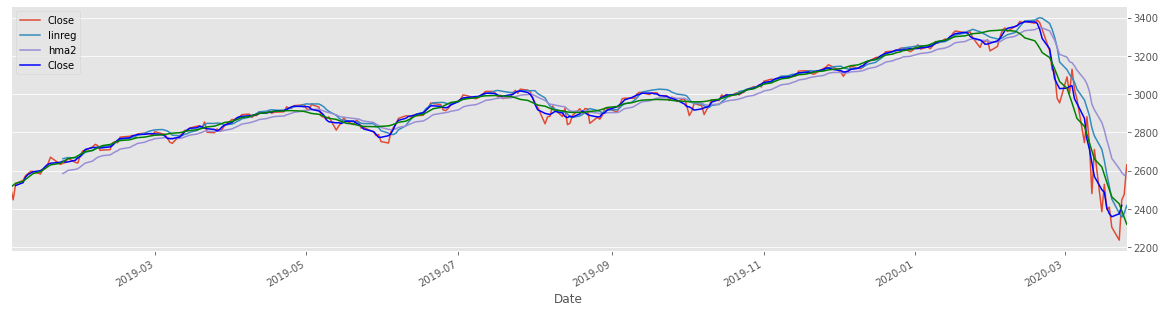

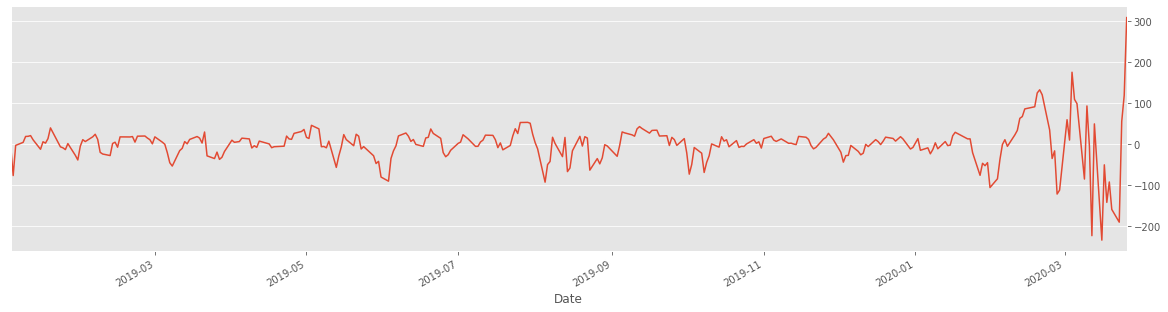

In [20]:

Z = spy5.iloc[:,3:4].values

spy5['zscore'] = sp.stats.zscore(Z,axis=0,ddof=0,nan_policy='propagate',)

spy5.zscore.plot(label='ZSCORE',figsize=(20,5),style='g',secondary_y=True,)
plt.show();
spy5.Close.plot(figsize=(20,5),style='b',secondary_y=True,);
plt.show()
spy5_decomp.trend.plot(figsize=(20,5),style='g',secondary_y=True,)
plt.show()

bk_cycles = sm.tsa.filters.bkfilter(spy5.Close,low=3,high=32,K=12)
bk_cycles.plot(figsize=(20,5),style='b',secondary_y=True,)

bk_cycles1 = sm.tsa.filters.bkfilter(result.trend,low=6,high=32,K=12)
bk_cycles1.plot(figsize=(20,5),style='r',secondary_y=True,)
spy5_decomp.cycle

bk_cycles1 = sm.tsa.filters.bkfilter(spy5_decomp.cycle,low=6,high=32,K=12)
bk_cycles1.plot(figsize=(20,5),style='y',secondary_y=True,)
plt.show()

spy5.Close.plot(figsize=(20,5),secondary_y=True,)

spy5['linreg'] = ta.linreg(spy5['High'],length=15,offset=None)
spy5.linreg.plot(figsize=(20,5),secondary_y=True,)

spy5['hma2'] = ta.ema(spy5['Close'], length=15)
spy5.hma2.plot(figsize=(20,5),secondary_y=True,)

result.trend.plot(figsize=(20,5),secondary_y=True, style='b')

plt.legend()


spy5_decomp.trend.plot(figsize=(20,5),style='g',secondary_y=True,)
plt.show()
spy5_decomp.cycle.plot(figsize=(20,5),secondary_y=True,)
plt.show()

# https://www.statsmodels.org/stable/examples/notebooks/generated/statespace_cycles.html

In [21]:

ucarima = sm.tsa.UnobservedComponents(spy5.Close,'rwalk', autoregressive=6,cycle=True, stochastic_cycle=True, damped_cycle=True,)
# Here the powell method is used, since it achieves a
# higher loglikelihood than the default L-BFGS method
res_ucarima = ucarima.fit(method='powell', disp=False)
print(res_ucarima.summary())



/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                            Unobserved Components Results                            
Dep. Variable:                         Close   No. Observations:                  311
Model:                           random walk   Log Likelihood               -1574.039
                   + damped stochastic cycle   AIC                           3170.078
                                     + AR(6)   BIC                           3211.109
Date:                       Thu, 26 Mar 2020   HQIC                          3186.484
Time:                               23:11:47                                         
Sample:                                    0                                         
                                       - 311                                         
Covariance Type:                         opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------

In [22]:
mod_uc = sm.tsa.UnobservedComponents(
    spy5.Close, 'rwalk',
    cycle=True, stochastic_cycle=True, damped_cycle=True,
)
# Here the powell method gets close to the optimum
res_uc = mod_uc.fit(method='powell', disp=False)
# but to get to the highest loglikelihood we do a
# second round using the L-BFGS method.
res_uc = mod_uc.fit(res_uc.params, disp=False)
print(res_uc.summary())

                            Unobserved Components Results                            
Dep. Variable:                         Close   No. Observations:                  311
Model:                           random walk   Log Likelihood               -1601.275
                   + damped stochastic cycle   AIC                           3210.550
Date:                       Thu, 26 Mar 2020   BIC                           3225.470
Time:                               23:11:49   HQIC                          3216.516
Sample:                                    0                                         
                                       - 311                                         
Covariance Type:                         opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
sigma2.level     1211.5439     64.582     18.760      0.00

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/structural.py:1015: RuntimeWarning: divide by zero encountered in double_scalars
  x / (1 - x)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


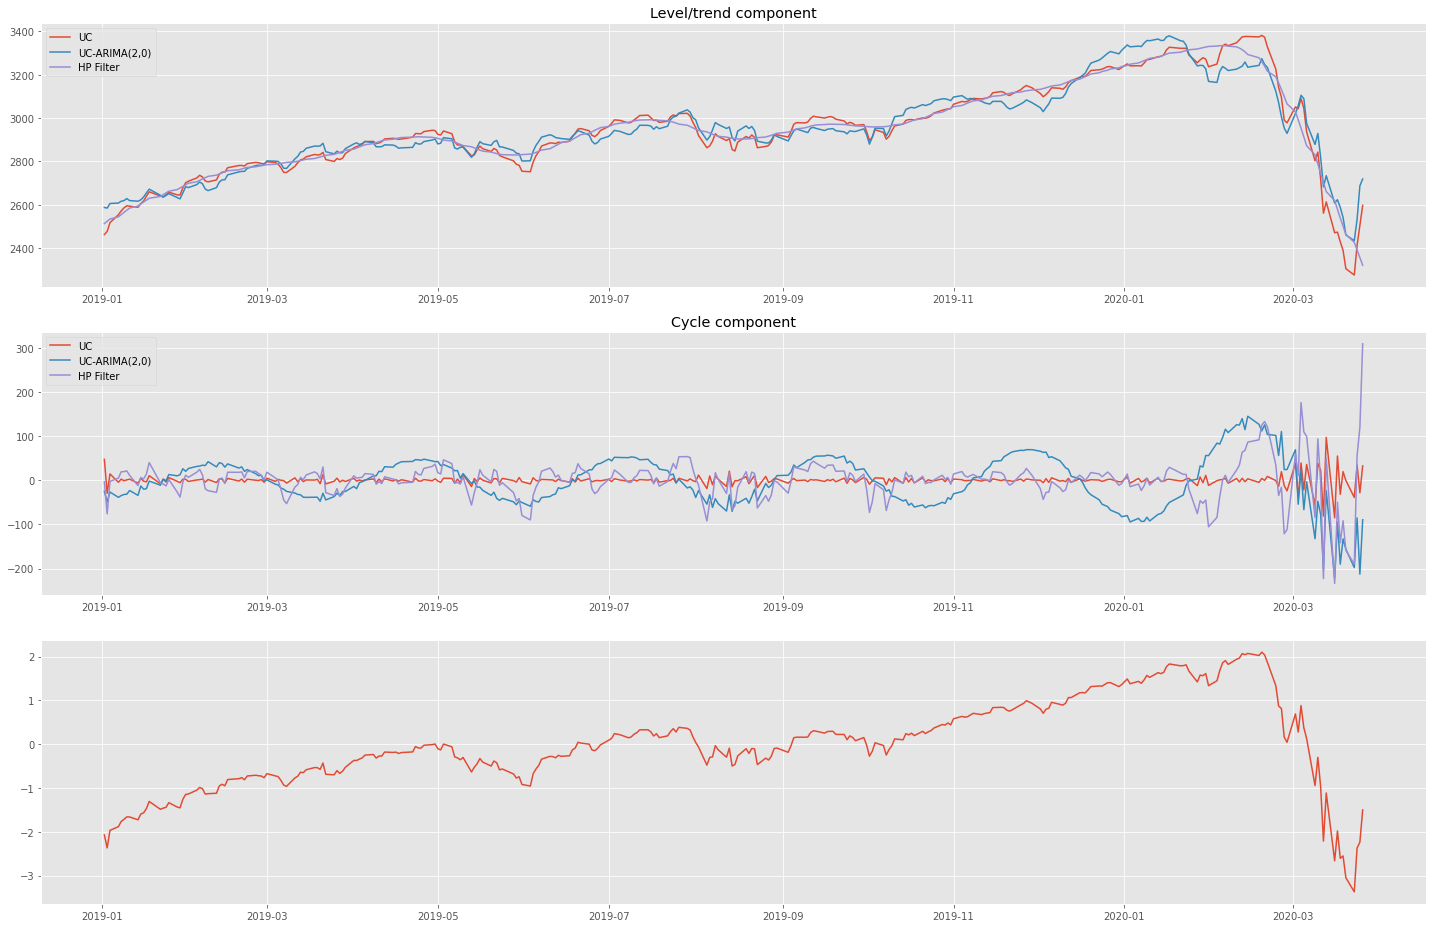

In [177]:
fig, axes = plt.subplots(3, figsize=(20,13));
axes[0].set(title='Level/trend component')
axes[0].plot(spy5.Close.index, res_uc.level.smoothed, label='UC')
axes[0].plot(spy5.Close.index, res_ucarima.level.smoothed, label='UC-ARIMA(2,0)')
axes[0].plot(spy5trend, label='HP Filter')
axes[0].legend(loc='upper left')
#axes[0].grid()

axes[1].set(title='Cycle component')
axes[1].plot(spy5.Close.index, res_uc.cycle.smoothed, label='UC',)
axes[1].plot(spy5.Close.index, res_ucarima.autoregressive.smoothed, label='UC-ARIMA(2,0)')
axes[1].plot(spy5cycle, label='HP Filter')
axes[1].legend(loc='upper left')
#axes[1].grid()
axes[2].plot(spy5.zscore)

fig.tight_layout();

plt.show()



https://github.com/theJollySin/scipy_con_2019/blob/master/modern_time_series_analysis/ModernTimeSeriesAnalysis/StateSpaceModels/2_Gaussian_HMM_INSTRUCTOR.ipynb

https://www.youtube.com/watch?v=v5ijNXvlC5A&list=TLPQMjIwMzIwMjATqNNWmd9kow&index=2

In [0]:
test1 = web.DataReader('^vix','yahoo',start= datetime.datetime(2017,1,27) ,end= datetime.datetime(2020,1,1),)


In [0]:
vals = np.expand_dims(test1.Close.values,1)
n_states = 6
model = GaussianHMM(n_components=n_states,n_iter=1000).fit(vals)
hidden_states= model.predict(vals)

In [268]:
hidden_states[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [269]:

np.bincount(hidden_states)

array([123,  91, 132,  40, 169, 182])

https://www.quantstart.com/articles/hidden-markov-models-for-regime-detection-using-r/

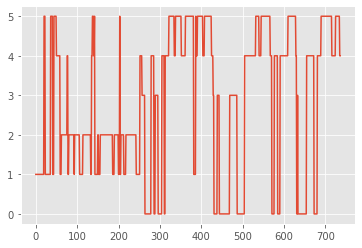

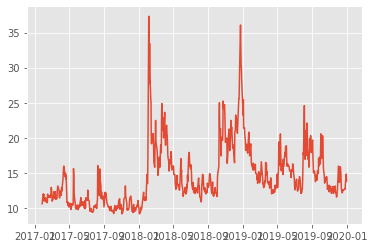

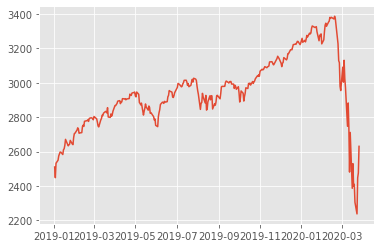

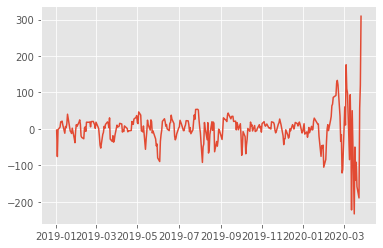

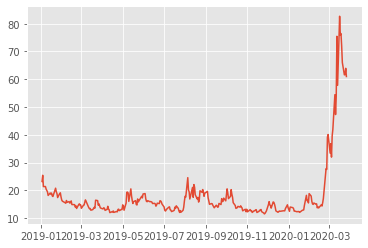

In [270]:
plt.plot(hidden_states)
plt.show()
plt.plot(test1.Close)
plt.show()
plt.plot(spy5.Close)
plt.show()
plt.plot(spy5_decomp.cycle)
plt.show()
plt.plot(vix.Close)


In [0]:

def fitHMM(vals, n_states):
    vals = np.reshape(vals,[len(vals),1])
    
    # fit Gaussian HMM to Q
    model = GaussianHMM(n_components=n_states, n_iter=1000).fit(vals)
     
    # classify each observation as state 0 or 1
    hidden_states = model.predict(vals)
 
    # fit HMM parameters
    mus = np.squeeze(model.means_)
    sigmas = np.squeeze(np.sqrt(model.covars_))
    transmat = np.array(model.transmat_)
    print(mus)
    print(sigmas)
    # re-order parameters in ascending order of mean of underlying distribution
    idx      = np.argsort(mus)
    mus      = mus[idx]
    sigmas   = sigmas[idx]
    transmat = transmat[idx, :][:, idx]
    
    state_dict = {}
    states = [i for i in range(n_states)]
    for i in idx:
        state_dict[i] = states[idx[i]]
    
    relabeled_states = [state_dict[h] for h in hidden_states]
    return (relabeled_states, mus, sigmas, transmat, model)

In [192]:
hidden_states, mus, sigmas, transmat, model = fitHMM(spy5_decomp.cycle.values, 3)

[ 10.087 -33.793  11.593]
[ 14.725  25.398 123.884]


In [0]:
def plot_states(ts_vals, states, time_vals):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Year)')
    ax1.set_ylabel('Nile river flow',         color=color)
    ax1.plot(time_vals, ts_vals,      color=color)
    ax1.tick_params(axis='y',            labelcolor=color)

    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Hidden state', color=color)  
    ax2.plot(time_vals,states,     color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    plt.show()

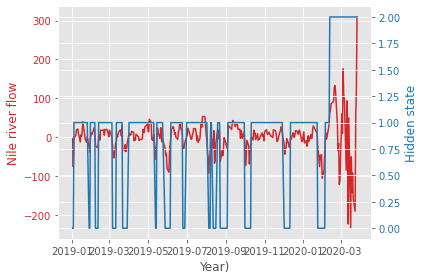

In [204]:

plot_states(spy5_decomp.cycle, hidden_states, spy5_decomp.cycle.index)

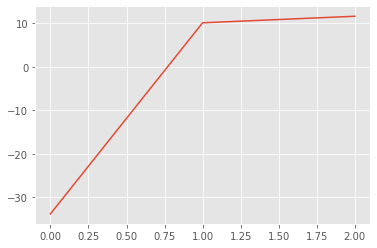

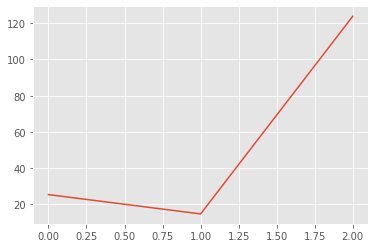

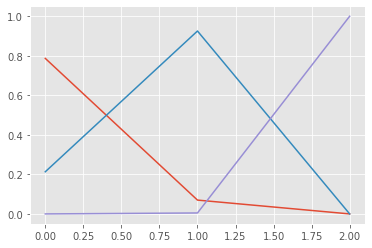

In [196]:
plt.plot(mus)
plt.show()
plt.plot(sigmas)
plt.show()


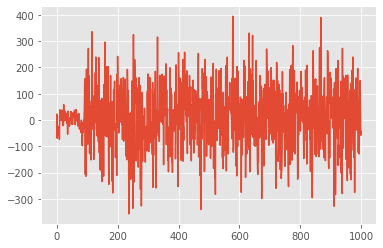

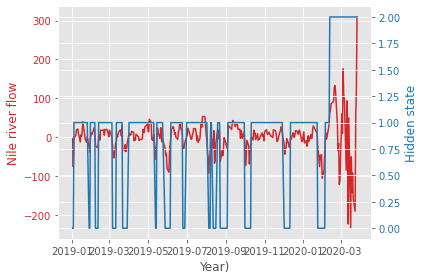

In [197]:
res = np.squeeze(model.sample(1000)[0])
plt.plot(res)
plot_states(spy5_decomp.cycle, hidden_states, spy5_decomp.cycle.index)

In [112]:
hidden_states, mus, sigmas, transmat, model = fitHMM(res, 3)


[2623.833 2567.17  2785.432]
[ 78.361 140.246  60.462]


In [0]:
def plot_states_no_time(ts_vals, states):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Year)')
    ax1.set_ylabel('Nile river flow',         color=color)
    ax1.plot( ts_vals,      color=color)
    ax1.tick_params(axis='y',            labelcolor=color)

    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Hidden state', color=color)  
    ax2.plot(states,     color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    plt.show()

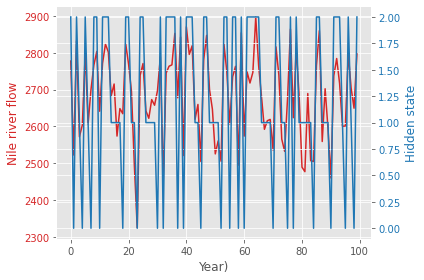

In [118]:

plot_states_no_time(res[:100], hidden_states[:100])

In [119]:
transmat

array([[0.055, 0.3  , 0.645],
       [0.315, 0.533, 0.152],
       [0.212, 0.38 , 0.408]])

https://www.youtube.com/watch?v=x6_id26u3xk

https://github.com/EthanRosenthal/skits